In [1]:
from keras.models import load_model
from keras.callbacks import History 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('IPMAN.csv')
# split data into training and testing sets
training_set = df.iloc[:, 1:2].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
regressor = load_model('model_best_current.h5')

In [5]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 36, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 36, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 36, 50)            20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [6]:
dataset_total = df.iloc[:, 1:2].values

In [7]:
timestemp = 36
prediction_month = 36

In [8]:
result = []
for i in range(0, prediction_month):
    X_test = []
    inputs = dataset_total[len(dataset_total) - timestemp:]
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)
    X_test.append(inputs[0:timestemp, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted = regressor.predict(X_test)
    predicted = sc.inverse_transform(predicted)
    result.append(predicted[0][0])
    dataset_total = np.append(dataset_total, predicted[0][0])
    

In [9]:
print(result)

[98.842735, 96.76882, 94.48303, 92.093475, 89.65158, 87.30179, 85.24735, 83.60963, 82.486435, 82.06139, 82.39353, 83.165764, 83.87334, 84.16655, 83.97181, 83.47748, 82.99489, 82.7978, 82.95828, 83.30389, 83.56078, 83.53869, 83.24741, 82.84293, 82.51135, 82.339386, 82.283516, 82.246, 82.146614, 81.963524, 81.72493, 81.47439, 81.245705, 81.05615, 80.903946, 80.772675]


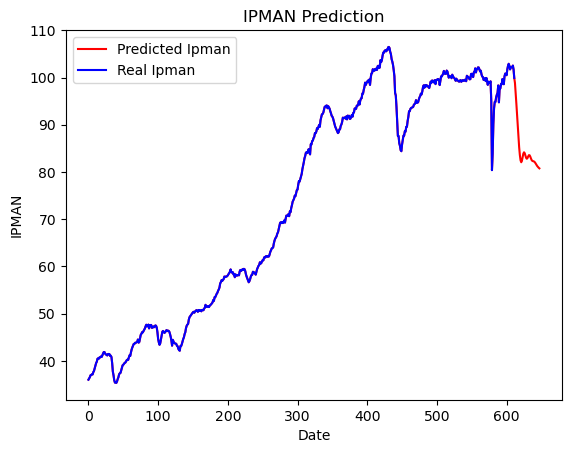

In [10]:
plt.plot(dataset_total, color = 'red', label = 'Predicted Ipman')
plt.plot(training_set, color = 'blue', label = 'Real Ipman')
plt.title('IPMAN Prediction')
plt.xlabel('Date')
plt.ylabel('IPMAN')
plt.legend()
plt.show()

In [11]:
result = pd.DataFrame({'IPMAN': result})
result.to_csv('result_IPMAN.csv', index=False)